<a href="https://colab.research.google.com/github/eftekhar-hossain/CONSTRAINT-AAAI2021/blob/main/Hindi_Hostility_Detection_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install scikit-multilearn

## Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import random
import re
%matplotlib inline
path = '/content/drive/My Drive/Colab Notebooks/NLP Projects/Constraint 2021/Hostility Detection/'
# importing MultiLabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from skmultilearn.adapt import MLkNN
from skmultilearn.adapt import BRkNNaClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, hamming_loss
import warnings
warnings.filterwarnings('ignore')


## **Read Encoded Dataset**

In [ ]:
train_dataset = pd.read_excel(path+'Constraint_Hindi_Train_Encoded.xlsx',index_col=[0])
val_dataset = pd.read_excel(path+'Constraint_Hindi_Valid_Encoded.xlsx',index_col=[0])

In [ ]:
train_dataset.columns

Index(['Unique ID', 'Post', 'Labels Set', 'defamation', 'fake', 'hate',
       'non-hostile', 'offensive'],
      dtype='object')

In [ ]:
# hostility labels
target_cols = ['defamation', 'fake', 'hate','non-hostile', 'offensive']

In [ ]:
val_dataset.head(10)

## Dataset Statistics

In [ ]:
def single_class_post_distribution(dataset,classes):
  number_of_comments = []
  for labels in classes:
    number_of_comments.append((labels, dataset[labels].sum()))
  stats = pd.DataFrame(number_of_comments,columns = ['class','number_of_posts'])
  return stats

In [ ]:
# training set
stats = single_class_post_distribution(train_dataset,target_cols)
#stats.head()

Text(0.5, 0, 'category')

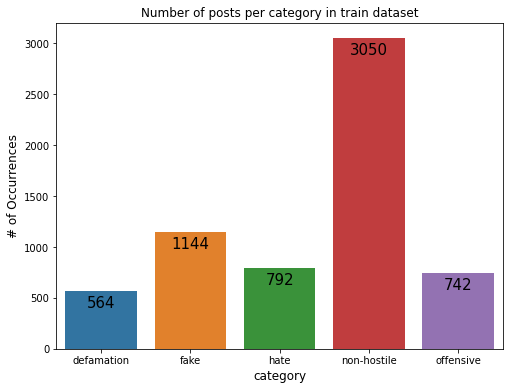

In [ ]:
# Barplot
plt.figure(figsize=(8,6))
splot = sns.barplot(x = 'class',y = 'number_of_posts',data = stats)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '1.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.title("Number of posts per category in train dataset")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('category', fontsize=12)


In [ ]:
# Validation set
stats_val = single_class_post_distribution(val_dataset,target_cols)
#stats_val.head()

Text(0.5, 0, 'category')

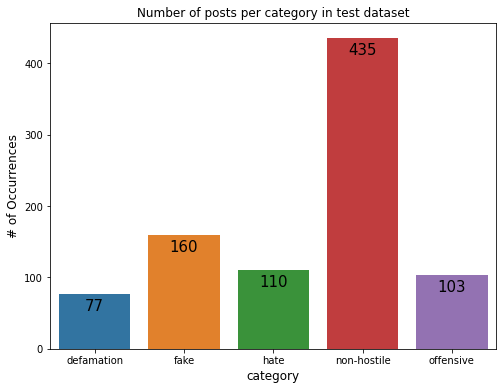

In [ ]:
# Barplot
plt.figure(figsize=(8,6))
splot = sns.barplot(x = 'class',y = 'number_of_posts',data = stats_val)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '1.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.title("Number of posts per category in test dataset")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('category', fontsize=12)


### **How many posts have multiple category ?**

In [ ]:
def posts_with_multilabel (dataset,label):
  rowsums = dataset.iloc[:,3:].sum(axis=1)
  x=rowsums.value_counts()
  df = pd.DataFrame(x.values,columns = ['number_of_posts'])
  #plot
  plt.figure(figsize=(8,6))
  splot = sns.barplot(x = df.index, y= 'number_of_posts',data = df)
  for p in splot.patches:
      splot.annotate(format(p.get_height(), '1.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
  plt.title(f"Multiple categories per post ({label} Set)")
  plt.ylabel('# of Occurrences', fontsize=12)
  plt.xlabel('# of categories', fontsize=12)

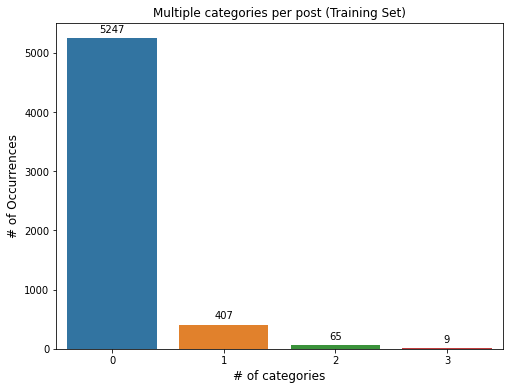

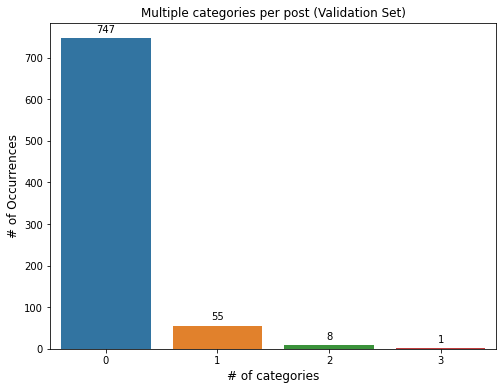

In [ ]:
datasets = [train_dataset,val_dataset]
label = ['Training', 'Validation']

for i,dataset in enumerate(datasets):
    posts_with_multilabel (dataset,label[i])

###**Number of comments classified as defamation, fake, non-hostile,....etc depending on their lengths**

In [ ]:
def comments_length_per_class(dataset,set_name):
  label = dataset[['defamation', 'fake' , 'hate' , 'non-hostile' , 'offensive']]
  label = label.values
  comment = dataset['Post']
  comment = comment.values
  y = np.zeros(label.shape)
  for ix in range(comment.shape[0]):
      l = len(comment[ix])
      if label[ix][0] :
          y[ix][0] = l
      if label[ix][1] :
          y[ix][1] = l
      if label[ix][2] :
          y[ix][2] = l
      if label[ix][3] :
          y[ix][3] = l
      if label[ix][4] :
          y[ix][4] = l

  labelsplt = target_cols
  color = ['red','green','blue','yellow','chartreuse']    
  bins = [1,200,400,600,800]    
  plt.title (f'Comments Length Per Class ({set_name} Set)')
  plt.hist(y,bins = bins,label = labelsplt,color = color)
  plt.axis([0, 800, 0, 2500])
  plt.xlabel('Length of comments')
  plt.ylabel('Number of comments') 
  plt.legend()
  plt.grid(True)
  plt.show()

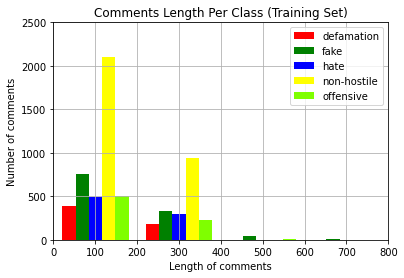

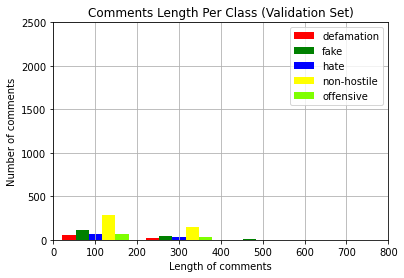

In [ ]:
# Apply the function on two set
datasets = [train_dataset, val_dataset]
label =  ['Training','Validation']

for i, dataset in enumerate(datasets):
    comments_length_per_class(dataset, label[i])

In [ ]:
# check for any 'null' comment in the train dataset
no_comment = train_dataset[train_dataset['Post'].isnull()]
len(no_comment)

0

In [ ]:
# let's see the total rows in train, test data and the numbers for the various categories
print('Total rows in train is {}'.format(len(train_dataset)))
print('Total rows in validation is {}'.format(len(test_dataset)))

Total rows in train is 5728
Total rows in validation is 811


## **Importing Orginal Dataset**

In [ ]:
# read the training dataset
train_dataset = pd.read_excel(path+'constraint_Hindi_Train.xlsx')
# read the validation dataset
val_dataset = pd.read_excel(path+'Constraint_Hindi_Valid.xlsx')
#dataset.head()
# read the Test dataset
test_dataset = pd.read_excel(path+'Test Set.xlsx')

In [ ]:
print("Number of Training Data: ",len(train_dataset))
print("Number of Validation Data: ",len(val_dataset))
print("Number of Test Data: ",len(test_dataset))

Number of Training Data:  5728
Number of Validation Data:  811
Number of Test Data:  1653


In [ ]:
train_dataset['Labels Set'].value_counts()

In [ ]:
# function to convert multilabels into one-hot-encoding
def multi_label_encoding(dataset):
  # converting the lables into list of array
  class_list = dataset['Labels Set'].apply(lambda x: list(x.split(",")))
  dataset['Labels'] = class_list
  return dataset


In [ ]:
train_dataset = multi_label_encoding(train_dataset)
val_dataset = multi_label_encoding(val_dataset)

In [ ]:
val_dataset.head()

## **Hindi Stopwords**

In [ ]:
# Read the stopwords txt file
stp = open(path+'hindi_stopwords.txt','r',encoding='utf-8').read().split()
num_of_stopwords = len(stp)
print(num_of_stopwords)
print(stp)

169
['अत', 'अपना', 'अपनी', 'अपने', 'अभी', 'अंदर', 'आदि', 'आप', 'इत्यादि', 'इन', 'इनका', 'इन्हीं', 'इन्हें', 'इन्हों', 'इस', 'इसका', 'इसकी', 'इसके', 'इसमें', 'इसी', 'इसे', 'उन', 'उनका', 'उनकी', 'उनके', 'उनको', 'उन्हीं', 'उन्हें', 'उन्हों', 'उस', 'उसके', 'उसी', 'उसे', 'एक', 'एवं', 'एस', 'ऐसे', 'और', 'कई', 'कर', 'करता', 'करते', 'करना', 'करने', 'करें', 'कहते', 'कहा', 'का', 'काफ़ी', 'कि', 'कितना', 'किन्हें', 'किन्हों', 'किया', 'किर', 'किस', 'किसी', 'किसे', 'की', 'कुछ', 'कुल', 'के', 'को', 'कोई', 'कौन', 'कौनसा', 'गया', 'घर', 'जब', 'जहाँ', 'जा', 'जितना', 'जिन', 'जिन्हें', 'जिन्हों', 'जिस', 'जिसे', 'जीधर', 'जैसा', 'जैसे', 'जो', 'तक', 'तब', 'तरह', 'तिन', 'तिन्हें', 'तिन्हों', 'तिस', 'तिसे', 'तो', 'था', 'थी', 'थे', 'दबारा', 'दिया', 'दुसरा', 'दूसरे', 'दो', 'द्वारा', 'न', 'नके', 'नहीं', 'ना', 'निहायत', 'नीचे', 'ने', 'पर', 'पहले', 'पूरा', 'पे', 'फिर', 'बनी', 'बही', 'बहुत', 'बाद', 'बाला', 'बिलकुल', 'भी', 'भीतर', 'मगर', 'मानो', 'मे', 'में', 'यदि', 'यह', 'यहाँ', 'यही', 'या', 'यिह', 'ये', 'रखें', 'रहा', 

## Data Cleaning

In [ ]:
# Cleaning Data [Remove unncessary symbols]
def cleaning_data(row,removing_stopwords):
      post = row.replace('\n', ' ') #removing new line 
      post = row.replace('।', ' ') #removing daari 
      post = re.sub('[^\u0900-\u097F]',' ',str(post)) #removing unnecessary punctuation
      if removing_stopwords == True:
        stp = open(path+'hindi_stopwords.txt','r',encoding='utf-8').read().split() # Stopwords
        result = post.split()
        post = [word.strip() for word in result if word not in stp ]
        post =" ".join(post)
      return post

In [ ]:
# Apply the function into the train dataset
train_dataset['cleaned'] = train_dataset['Post'].apply(cleaning_data,removing_stopwords = False)  
#Let's look at the number empty strings occur after cleaning
train_dataset['cleaned'].replace(r'^\s*$', np.NaN, regex=True,inplace = True)
train_dataset.dropna(subset=['cleaned'], inplace=True)
train_dataset = train_dataset.reset_index(drop=True)
print('After Removing empty strings Total rows in train is {}'.format(len(train_dataset)))


After Removing empty strings Total rows in train is 5727


In [ ]:
#Generate 50 random numbers between 10 and 5000
randomlist = random.sample(range(10, 5000), 50)
for i in randomlist:
  print(f'Post No- {i}\n', 'Original --\n', train_dataset['Post'][i],'\n',
        'Cleaned --\n',train_dataset['cleaned'][i],'\n')

In [ ]:
# Apply the function into the validation dataset
val_dataset['cleaned'] = val_dataset['Post'].apply(cleaning_data,removing_stopwords = False)  
import random
#Generate 50 random numbers between 10 and 5000
randomlist = random.sample(range(10, 800), 50)

for i in randomlist:
  print(f'Post No- {i}\n', 'Original --\n', val_dataset['Post'][i],'\n',
        'Cleaned --\n',val_dataset['cleaned'][i],'\n')

In [ ]:
test_dataset.columns

Index(['Unique ID', 'Post'], dtype='object')

In [ ]:
# Apply the function into the Test dataset
test_dataset['cleaned'] = test_dataset['Post'].apply(cleaning_data,removing_stopwords = False)  
import random
#Generate 50 random numbers between 10 and 5000
randomlist = random.sample(range(10, 800), 50)

for i in randomlist:
  print(f'Post No- {i}\n', 'Original --\n', test_dataset['Post'][i],'\n',
        'Cleaned --\n',test_dataset['cleaned'][i],'\n')

## Length Distribution

In [ ]:
def post_length_distribution(dataset,label,verbose):
  dataset['cleaned'] = dataset['Post'].apply(cleaning_data,removing_stopwords = verbose)  
  #Let's look at the number empty strings occur after cleaning
  dataset['cleaned'].replace(r'^\s*$', np.NaN, regex=True,inplace = True)
  dataset.dropna(subset=['cleaned'], inplace=True)
  new_dataset = dataset.reset_index(drop=True)
  # Let's look at the character length for the rows in the training data and record these
  new_dataset['char_length'] = new_dataset['cleaned'].apply(lambda x: len(str(x)))
  # look at the distribution plot for text length
  import matplotlib
  matplotlib.rc_file_defaults()
  frequency = dict()
  for i in new_dataset.char_length:
      frequency[i] = frequency.get(i, 0)+1
  print(f"{label} Dataset\n")
  #print(f"Remove {len(new_dataset.loc[new_dataset.char_length<1])} empty strings")
  plt.figure(figsize = (6,4))
  plt.bar(frequency.keys(), frequency.values(), color ="b")
  plt.xlim(0, 500)
  plt.xlabel('Length of the posts')
  plt.ylabel('Frequency')
  if verbose == True:
    plt.title(f'Post Length-Frequency Distribution (without stowords))')
  else:
    plt.title(f'Post Length-Frequency Distribution (with stowords))')  
  #plt.savefig(path+'len_dist.png',dpi = 1000,bbox_inches ='tight')
  plt.show()  

  print(f"Maximum Length of a Post: {max(new_dataset.char_length)}")
  print(f"Minimum Length of a Post: {min(new_dataset.char_length)}")
  print(f"Average Length of a Post: {round(np.mean(new_dataset.char_length),0)}")

In [ ]:
# Find length- frequency distribution for training dataset
verbose =  [False,True]
for i in verbose:
    post_length_distribution(train_dataset,'Training',i)

In [ ]:
# Find length- frequency distribution for val dataset
verbose =  [False,True]
for i in verbose:
    post_length_distribution(val_dataset,'Validation',i)

In [ ]:
# Find length- frequency distribution for val dataset
verbose =  [False,True]
for i in verbose:
    post_length_distribution(test_dataset,'Test',i)

## MultiLabel Encoding (Multilabel Binarizer)

In [ ]:
# label Encoding
multilabel = MultiLabelBinarizer()
train_labels = multilabel.fit_transform(train_dataset['Labels']) 
test_labels = multilabel.transform(val_dataset['Labels'])

In [ ]:
binary_labels = pd.DataFrame(train_labels, columns = multilabel.classes_)

In [ ]:
pd.DataFrame(test_labels, columns = multilabel.classes_)

,defamation,fake,hate,non-hostile,offensive
0,0,0,0,1,0
1,1,0,0,0,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
806,0,0,1,0,0
807,1,0,0,0,0
808,0,0,0,1,0
809,0,0,0,1,0


In [ ]:
# Select the columns that will be used for model preparation
text_cols = ['Unique ID', 'cleaned', 'Labels Set','Labels']
train_data = train_dataset[text_cols]
val_data = val_dataset[text_cols]

## **How to convert predictions into labels**

In [ ]:
print(multilabel.inverse_transform(y_val))

[('fake',), ('non-hostile',), ('non-hostile',), ('non-hostile',), ('non-hostile',), ('non-hostile',), ('hate',), ('non-hostile',), ('non-hostile',), ('non-hostile',), ('non-hostile',), ('non-hostile',), ('non-hostile',), ('fake',), ('defamation', 'hate'), ('fake',), ('non-hostile',), ('non-hostile',), ('non-hostile',), ('defamation',), ('hate',), ('hate',), ('defamation', 'hate'), ('non-hostile',), ('defamation',), ('offensive',), ('non-hostile',), ('hate',), ('non-hostile',), ('non-hostile',), ('non-hostile',), ('non-hostile',), ('hate', 'offensive'), ('hate',), ('defamation', 'offensive'), ('non-hostile',), ('offensive',), ('fake',), ('non-hostile',), ('fake',), ('offensive',), ('non-hostile',), ('offensive',), ('defamation',), ('defamation',), ('non-hostile',), ('defamation',), ('non-hostile',), ('fake',), ('non-hostile',), ('non-hostile',), ('fake',), ('non-hostile',), ('non-hostile',), ('non-hostile',), ('hate', 'offensive'), ('fake',), ('non-hostile',), ('hate',), ('defamation',)

In [ ]:
labels = multilabel.inverse_transform(y_val)
l = []
for i in labels:
  l.append(','.join(i))

print(l)  


['fake', 'non-hostile', 'non-hostile', 'non-hostile', 'non-hostile', 'non-hostile', 'hate', 'non-hostile', 'non-hostile', 'non-hostile', 'non-hostile', 'non-hostile', 'non-hostile', 'fake', 'defamation,hate', 'fake', 'non-hostile', 'non-hostile', 'non-hostile', 'defamation', 'hate', 'hate', 'defamation,hate', 'non-hostile', 'defamation', 'offensive', 'non-hostile', 'hate', 'non-hostile', 'non-hostile', 'non-hostile', 'non-hostile', 'hate,offensive', 'hate', 'defamation,offensive', 'non-hostile', 'offensive', 'fake', 'non-hostile', 'fake', 'offensive', 'non-hostile', 'offensive', 'defamation', 'defamation', 'non-hostile', 'defamation', 'non-hostile', 'fake', 'non-hostile', 'non-hostile', 'fake', 'non-hostile', 'non-hostile', 'non-hostile', 'hate,offensive', 'fake', 'non-hostile', 'hate', 'defamation', 'non-hostile', 'fake', 'non-hostile', 'non-hostile', 'non-hostile', 'non-hostile', 'non-hostile', 'offensive', 'defamation', 'hate', 'non-hostile', 'defamation', 'non-hostile', 'non-hostil

In [ ]:
predict = pd.DataFrame({'Labels':l})
predict[100:150]

## Merge the Dataset

In [ ]:
complete_data = pd.concat([train_data['cleaned'],val_dataset['cleaned'],test_dataset['cleaned']],names=['cleaned'],ignore_index=True)
len(complete_data)

8191

## TF-iDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
#use_idf=True,tokenizer=lambda x: x.split()
vectorizer = TfidfVectorizer(use_idf=True, tokenizer=lambda x: x.split(),min_df= 5, ngram_range=(1,3))
vectorised_posts = vectorizer.fit(complete_data)
vectorized_train_posts = vectorizer.transform(train_data['cleaned'])
vectorized_test_posts = vectorizer.transform(val_data['cleaned'])

print("Feature Size: ", vectorized_train_posts.shape[1])
#vectorizer.vocabulary_

Feature Size:  11766


In [ ]:
vectorized_train_posts.shape

(5727, 15778)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(vectorized_train_posts,train_labels,test_size = 0.15,random_state = 42)
print("Training Set Size : ",X_train.shape)
print("Validation Set Size : ",X_val.shape)

Training Set Size :  (4867, 86509)
Validation Set Size :  (860, 86509)


In [ ]:
#samp_comment = X_val[]
#first_vector = vectorizer.transform([samp_comment])
#df = pd.DataFrame(first_vector.T.todense(), index=vectorizer.get_feature_names(), columns=["tfidf"])
#a = df.sort_values(by=["tfidf"],ascending=False)
#print(a[0:len(samp_comment.split())])

In [ ]:
vectorizer.get_feature_names()

## Evaluation Function

In [ ]:
ModelsPerformance = {}
def print_score(modelname,actual_labels, predictions):
  accuracy = accuracy_score(actual_labels, predictions)

  precision = precision_score(actual_labels, predictions, average='weighted')
  recall = recall_score(actual_labels, predictions, average='weighted')
  f1 = f1_score(actual_labels, predictions, average='weighted')


  print("------" + modelname + " Model Metrics-----")
  print("Accuracy: {:.4f}\nPrecision:-  {:.4f}\n Recall: - {:.4f}\n F1-measure: -  {:.4f}\n "\
          .format(accuracy, precision, recall, f1))
  ModelsPerformance[modelname] = f1


## Hyperparameter Tunning Function

In [ ]:
# Hyperparameter Tunning Using Grid Search
from sklearn.model_selection import GridSearchCV
def parameter_tunning(modelname, param_grid ):
  clf = OneVsRestClassifier(modelname)
  model_tunning = GridSearchCV(clf,param_grid, scoring = 'f1_weighted', cv=10, n_jobs=-1)
  model_tunning.fit(vectorized_train_posts, train_labels)
  print("Grid Search on ----",modelname.__class__.__name__)
  print('Best F1-Score:',model_tunning.best_score_)
  print('Best Parameters:',model_tunning.best_params_)

### Logistic Regression (One Vs Rest)

In [ ]:
# Grid search cross validation
from sklearn.linear_model import LogisticRegression
param_grid={"estimator__C":np.logspace(-3,3,7)}
parameter_tunning(LogisticRegression(),param_grid)

In [ ]:
# After Tunning
# Optimum C = 100 
lr = OneVsRestClassifier( LogisticRegression(C = 10) )
lr.fit(vectorized_train_posts,train_labels)
y_pred = lr.predict(vectorized_test_posts)
print_score('LR (OvR)',test_labels,y_pred)

------LR (OvR) Model Metrics-----
Accuracy: 0.5697
Precision:-  0.7519
 Recall: - 0.5898
 F1-measure: -  0.6396
 


In [ ]:
test_pred = lr.predict(vectorized_test_posts)
from sklearn.metrics import classification_report
#Show precision and recall per genre
print(classification_report(test_labels,y_pred ,target_names=binary_labels.columns))

              precision    recall  f1-score   support

  defamation       0.57      0.05      0.10        77
        fake       0.69      0.36      0.47       160
        hate       0.49      0.35      0.41       110
 non-hostile       0.91      0.86      0.89       435
   offensive       0.59      0.46      0.52       103

   micro avg       0.79      0.59      0.68       885
   macro avg       0.65      0.41      0.47       885
weighted avg       0.75      0.59      0.64       885
 samples avg       0.61      0.62      0.61       885



In [ ]:
pred = lr.predict_proba(vectorized_test_posts)
new_pred = pred > 0.19
new_labels = new_pred.astype('uint8')
labels = multilabel.inverse_transform(new_labels)
l = []
for i in labels:
  l.append(','.join(i))
 

predict = pd.DataFrame({'Unique ID':val_dataset['Unique ID'],'Labels Set':l})
predict

predict['Labels Set'].value_counts()


non-hostile                         399
fake,non-hostile                    115
fake                                 47
hate,offensive                       41
hate,non-hostile                     22
defamation,hate,offensive            22
fake,hate                            21
fake,hate,offensive                  16
hate                                 15
non-hostile,offensive                13
offensive                            13
defamation,offensive                 13
defamation,fake                      12
fake,offensive                       11
defamation,non-hostile                8
defamation,fake,hate                  7
defamation,fake,hate,offensive        6
defamation                            6
defamation,hate                       5
defamation,fake,offensive             4
defamation,non-hostile,offensive      4
hate,non-hostile,offensive            3
defamation,hate,non-hostile           3
fake,non-hostile,offensive            2
defamation,fake,non-hostile           1


### SVM (One Vs Rest)

In [ ]:
svc = OneVsRestClassifier( LinearSVC())
svc.fit(vectorized_train_posts,train_labels)
y_pred = svc.predict(vectorized_test_posts)
print_score('SVM (OvR)',test_labels,y_pred)

------SVM (OvR) Model Metrics-----
Accuracy: 0.5832
Precision:-  0.7682
 Recall: - 0.6090
 F1-measure: -  0.6573
 


In [ ]:
y_pred = svc.predict(vectorized_test_posts)
from sklearn.metrics import classification_report
#Show precision and recall per genre
print(classification_report(test_labels,y_pred ,target_names=binary_labels.columns))

              precision    recall  f1-score   support

  defamation       0.67      0.05      0.10        77
        fake       0.68      0.41      0.51       160
        hate       0.50      0.37      0.43       110
 non-hostile       0.92      0.87      0.89       435
   offensive       0.62      0.49      0.54       103

   micro avg       0.80      0.61      0.69       885
   macro avg       0.68      0.44      0.50       885
weighted avg       0.77      0.61      0.66       885
 samples avg       0.63      0.63      0.63       885



In [ ]:
pred = svc.predict(vectorized_test_posts)
new_pred = pred > 0.08
new_labels = new_pred.astype('uint8')
labels = multilabel.inverse_transform(new_labels)
l = []
for i in labels:
  l.append(','.join(i))
 

predict = pd.DataFrame({'Unique ID':val_dataset['Unique ID'],'Labels Set':l})
predict

predict['Labels Set'].value_counts()


non-hostile             423
                        157
fake                     87
hate                     45
offensive                44
hate,offensive           20
defamation                8
fake,non-hostile          8
fake,hate                 6
fake,offensive            4
defamation,offensive      3
defamation,hate           2
fake,hate,offensive       2
hate,non-hostile          1
defamation,fake           1
Name: Labels Set, dtype: int64

In [ ]:
##########################################
test_posts =  vectorizer.transform(test_dataset['cleaned'])
test_pred = lr.predict(test_posts)

labels = multilabel.inverse_transform(test_pred)
l = []
for i in labels:
  l.append(','.join(i))

predict = pd.DataFrame({'Unique ID':test_dataset['Unique ID'],'Labels Set':l})
predict

predict['Labels Set'].value_counts()


non-hostile                  857
                             391
fake                         155
offensive                     88
hate                          58
hate,offensive                36
defamation                    28
fake,non-hostile              12
defamation,hate                8
defamation,offensive           6
fake,hate                      4
defamation,fake                3
defamation,fake,hate           2
defamation,non-hostile         1
fake,hate,offensive            1
defamation,hate,offensive      1
defamation,fake,offensive      1
hate,non-hostile               1
Name: Labels Set, dtype: int64

### Naive bayes (One Vs Rest)

In [ ]:
# Grid Search
from sklearn.naive_bayes import MultinomialNB
param_grid={"estimator__alpha":np.linspace(0.1,1,20)}
parameter_tunning(MultinomialNB(),param_grid)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb =  OneVsRestClassifier(MultinomialNB(0.6))
nb.fit(vectorized_train_posts,train_labels)
y_pred = nb.predict(vectorized_test_posts)
print_score('MNB (OvR)',test_labels,y_pred)

------MNB (OvR) Model Metrics-----
Accuracy: 0.4920
Precision:-  0.6953
 Recall: - 0.4531
 F1-measure: -  0.4595
 


In [ ]:
test_pred = nb.predict(vectorized_test_posts)
from sklearn.metrics import classification_report
#Show precision and recall per genre
print(classification_report(test_labels,test_pred ,target_names=binary_labels.columns))

              precision    recall  f1-score   support

  defamation       0.00      0.00      0.00        77
        fake       1.00      0.04      0.08       160
        hate       0.00      0.00      0.00       110
 non-hostile       0.89      0.90      0.89       435
   offensive       0.67      0.02      0.04       103

   micro avg       0.89      0.45      0.60       885
   macro avg       0.51      0.19      0.20       885
weighted avg       0.70      0.45      0.46       885
 samples avg       0.49      0.49      0.49       885



### Multi-Label KNN Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'k': range(1,3), 's': [0.5, 0.7, 1.0]}
classifier = GridSearchCV(MLkNN(), param_grid, scoring='f1_micro')
classifier.fit(vectorised_train_posts, y_train)
print('best parameters :', classifier.best_params_, 'best score: ',
      classifier.best_score_)

best parameters : {'k': 1, 's': 0.5} best score:  0.6082137681017313


In [ ]:
mlknn  = MLkNN(k = 1,s = 0.5)
mlknn.fit(vectorized_train_posts,train_labels)
y_pred = mlknn.predict(vectorized_test_posts)
print_score('MLKnn',test_labels,y_pred)

------MLKnn Model Metrics-----
Accuracy: 0.6005
Precision:-  0.6287
 Recall: - 0.6282
 F1-measure: -  0.6274
 


In [ ]:
test_pred = mlknn.predict(vectorized_test_posts)
from sklearn.metrics import classification_report
#Show precision and recall per genre
print(classification_report(test_labels,y_pred ,target_names=binary_labels.columns))

              precision    recall  f1-score   support

  defamation       0.35      0.26      0.30        77
        fake       0.50      0.53      0.52       160
        hate       0.34      0.29      0.31       110
 non-hostile       0.84      0.84      0.84       435
   offensive       0.46      0.50      0.48       103

   micro avg       0.64      0.63      0.63       885
   macro avg       0.50      0.49      0.49       885
weighted avg       0.63      0.63      0.63       885
 samples avg       0.66      0.65      0.65       885



### Binary Relavance KNN Classifier

In [ ]:
parameters = {'k': range(3,5)}
classifier = GridSearchCV(BRkNNaClassifier(), parameters, scoring='f1_micro')
classifier.fit(vectorised_train_posts ,y_train)
print('best parameters :', classifier.best_params_,
      'best score: ',classifier.best_score_)

best parameters : {'k': 3} best score:  0.6243923425774354


In [ ]:
from skmultilearn.adapt import BRkNNaClassifier
brknn  = BRkNNaClassifier(k=3)
brknn.fit(vectorized_train_posts,train_labels)
y_pred = brknn.predict(vectorized_test_posts)
print_score('BRkNN',test_labels,y_pred)

------BRkNN Model Metrics-----
Accuracy: 0.6017
Precision:-  0.6672
 Recall: - 0.6034
 F1-measure: -  0.6266
 


In [ ]:
test_pred = brknn.predict(vectorized_test_posts)
from sklearn.metrics import classification_report
#Show precision and recall per genre
print(classification_report(test_labels,y_pred ,target_names=binary_labels.columns))

              precision    recall  f1-score   support

  defamation       0.28      0.09      0.14        77
        fake       0.59      0.46      0.52       160
        hate       0.45      0.27      0.34       110
 non-hostile       0.84      0.86      0.85       435
   offensive       0.59      0.50      0.54       103

   micro avg       0.71      0.60      0.65       885
   macro avg       0.55      0.44      0.48       885
weighted avg       0.67      0.60      0.63       885
 samples avg       0.64      0.63      0.63       885



## Multilabel Classifiers - Problem Transformation

### Binary Relavance (SVM)

In [ ]:
from skmultilearn.problem_transform import BinaryRelevance

brsvm = BinaryRelevance(
    classifier = LinearSVC(),
)

brsvm.fit(vectorized_train_posts,train_labels)
y_pred = brsvm.predict(vectorized_test_posts)
print_score('BRSVM',test_labels,y_pred)

------BRSVM Model Metrics-----
Accuracy: 0.5943
Precision:-  0.7421
 Recall: - 0.6136
 F1-measure: -  0.6549
 


In [ ]:
test_pred = brsvm.predict(vectorized_test_posts)
from sklearn.metrics import classification_report
#Show precision and recall per genre
print(classification_report(test_labels,y_pred ,target_names=binary_labels.columns))

              precision    recall  f1-score   support

  defamation       0.67      0.05      0.10        77
        fake       0.68      0.41      0.51       160
        hate       0.50      0.37      0.43       110
 non-hostile       0.92      0.87      0.89       435
   offensive       0.62      0.49      0.54       103

   micro avg       0.80      0.61      0.69       885
   macro avg       0.68      0.44      0.50       885
weighted avg       0.77      0.61      0.66       885
 samples avg       0.63      0.63      0.63       885



In [ ]:
##########################################
test_posts =  vectorizer.transform(test_dataset['cleaned'])
test_pred = brsvm.predict(test_posts)

labels = multilabel.inverse_transform(test_pred)
l = []
for i in labels:
  l.append(','.join(i))

predict = pd.DataFrame({'Unique ID':test_dataset['Unique ID'],'Labels Set':l})
predict

predict['Labels Set'].value_counts()


### Label Powerset (SVM)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from skmultilearn.problem_transform import LabelPowerset
lpsvm = LabelPowerset(classifier = LinearSVC(C =2.7,))
lpsvm.fit(vectorized_train_posts,train_labels)
y_pred = lpsvm.predict(vectorized_test_posts)
print_score('LPSVM',test_labels,y_pred)

------LPSVM Model Metrics-----
Accuracy: 0.6695
Precision:-  0.6769
 Recall: - 0.6791
 F1-measure: -  0.6733
 


In [ ]:
test_pred = lpsvm.predict(vectorized_test_posts)
from sklearn.metrics import classification_report
#Show precision and recall per genre
print(classification_report(test_labels,test_pred ,target_names=binary_labels.columns))

              precision    recall  f1-score   support

  defamation       0.34      0.13      0.19        77
        fake       0.62      0.55      0.58       160
        hate       0.54      0.41      0.46       110
 non-hostile       0.81      0.94      0.87       435
   offensive       0.56      0.45      0.50       103

   micro avg       0.71      0.67      0.69       885
   macro avg       0.57      0.49      0.52       885
weighted avg       0.67      0.67      0.66       885
 samples avg       0.72      0.70      0.71       885



In [ ]:
##########################################
test_posts =  vectorizer.transform(test_dataset['cleaned'])
test_pred = lpsvm.predict(test_posts)

labels = multilabel.inverse_transform(test_pred)
l = []
for i in labels:
  l.append(','.join(i))

predict = pd.DataFrame({'Unique ID':test_dataset['Unique ID'],'Labels Set':l})
predict

predict['Labels Set'].value_counts()


non-hostile                  984
fake                         300
hate                         147
offensive                    140
defamation                    58
hate,offensive                14
defamation,hate                2
defamation,offensive           2
defamation,fake                2
defamation,fake,hate           2
defamation,fake,offensive      1
fake,hate                      1
Name: Labels Set, dtype: int64

In [ ]:
predict.to_csv(path + 'run_3_lpsvm_fake_62_trigram.csv')

### Classifier Chain (SVM)

In [ ]:
from skmultilearn.problem_transform import ClassifierChain

ccsvm = ClassifierChain(
    classifier = LinearSVC(C = 0.9),
    order=[i for i in range(5)]
)
ccsvm.fit(vectorized_train_posts,train_labels)
y_pred = ccsvm.predict(vectorized_test_posts)
print_score('CCSVM',test_labels,y_pred)

------CCSVM Model Metrics-----
Accuracy: 0.6510
Precision:-  0.6527
 Recall: - 0.6644
 F1-measure: -  0.6385
 


In [ ]:
test_pred = ccsvm.predict(vectorized_test_posts)
from sklearn.metrics import classification_report
#Show precision and recall per genre
print(classification_report(test_labels,y_pred ,target_names=binary_labels.columns))

              precision    recall  f1-score   support

  defamation       0.50      0.09      0.15        77
        fake       0.65      0.46      0.53       160
        hate       0.46      0.35      0.40       110
 non-hostile       0.75      0.96      0.84       435
   offensive       0.66      0.50      0.57       103

   micro avg       0.69      0.67      0.68       885
   macro avg       0.60      0.47      0.50       885
weighted avg       0.66      0.67      0.64       885
 samples avg       0.70      0.70      0.70       885



#Confusion Matrix

In [ ]:
### Hostiltiy
actual = pd.read_excel(path+'Test Set Complete.xlsx')
pred = pd.read_csv(path+'Run4.csv')

In [ ]:
actual['predicted_label_set'] = pred['Labels Set']

In [ ]:
for i in range(len(actual)):
  if actual['Labels Set'][i] != actual['predicted_label_set'][i]:
        print('Post:=====>\n',actual['Post'][i],
          '\nActual Label: ',actual['Labels Set'][i],
          '\nPredicted Label:', actual['predicted_label_set'][i])  

Post:=====>
 कीस की को रोजगार चाहिए फिर नहीं कहना रोजगार नहीं मिलता है 20 करोड को रोजगार दे दिया है वह भी मात्र 6 साँल में चार साल अभी बाकी है और हर साल दो करोड़ रोजगार देने का ही वादा था 10 साल में देना था 20 करोड को लोगो को रोजगार जो मात्र 6 साल में लक्ष्य को प्राप्त करने वाली पहली सरकार है 
Actual Label:  defamation,fake,offensive 
Predicted Label: non-hostile
Post:=====>
 कोई भी कांग्रेसी, ऊंची छत पर, रेलवे लाइन पर, ऊंची बिल्डिंग पर, एकांत जगह पर, कुए के पास दिखाई दे, तुरंत पुलिस को सूचित करें,🙏
😂👍
विलुप्त होती हुई प्रजातियो को बचाना हमारा फर्ज है। 
Actual Label:  hate 
Predicted Label: fake
Post:=====>
 RT @_Pb_swain_: इन पंचर छापों को कोन समझाए कि उनके रोजगार में कमी का कारण मोदी नहीं 
👇
ट्यूब लैस टायर है.😂😂😂😂 
Actual Label:  defamation 
Predicted Label: fake
Post:=====>
 पश्चिम बंगाल में फिर हुई माओवादियों की वापसी, हाल ही में हुई घटनाएं इसका प्रमाण है  
#Maoist #WestBengal 
https://t.co/pP1AOvOv0b 
Actual Label:  non-hostile 
Predicted Label: fake
Post:=====>
 @BasudebaTripat4:

In [ ]:
### Fake-Real
actual = pd.read_excel(path+'english_test_with_labels.xlsx')
pred = pd.read_csv(path+'NLP@CUET_2.csv')


In [ ]:
actual['predicted_label'] = pred['label']

In [ ]:
for i in range(len(actual)):
  if actual['label'][i] != actual['predicted_label'][i]:
        print('Tweet:=====>\n',actual['tweet'][i],
          '\nActual Label: ',actual['label'][i],
          '\nPredicted Label:', actual['predicted_label'][i])  

Tweet:=====>
 Low #vitaminD was an independent predictor of worse prognosis in patients with COVID-19. https://t.co/CGD6Kphn31 https://t.co/chtni8K4Jd 
Actual Label:  real 
Predicted Label: fake
Tweet:=====>
 The government should consider bringing in any new national lockdown rules over Christmas rather than now says an Oxford University professor https://t.co/pdOls6cqoN 
Actual Label:  real 
Predicted Label: fake
Tweet:=====>
 Two interesting correlations:

1) Children tend to weather COVID-19 pretty well; they also get a ton of Vitamin D.

2) Black people are getting slammed by COVID-19; black people also have much higher instances of Vitamin D deficiency (76% vs 40% in the general population). 
Actual Label:  fake 
Predicted Label: real
Tweet:=====>
 The only way to tell if a kid just has a cold (and can go to school) is robust rapid testing for #coronavirus — and right now we don't have it. https://t.co/plBZSPGv8A via @methodsmanmd https://t.co/L5tHkB1njK 
Actual Label:  real 
Pre

In [ ]:
actual = multi_label_encoding(actual)
pred = multi_label_encoding(pred)

In [ ]:
multilabel = MultiLabelBinarizer()
actual_labels = multilabel.fit_transform(actual['Labels']) 
prediction_labels = multilabel.transform(pred['Labels'])

In [ ]:
actual_labels

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

y_true = np.array(actual_labels)
y_pred = np.array(prediction_labels)

labels = ['defamation', 'fake', 'hate','non-hostile', 'offensive']

conf_mat_dict={}

for label_col in range(len(labels)):
    y_true_label = y_true[:, label_col]
    y_pred_label = y_pred[:, label_col]
    conf_mat_dict[labels[label_col]] = confusion_matrix(y_pred=y_pred_label, y_true=y_true_label)


for label, matrix in conf_mat_dict.items():
    print("Confusion matrix for label {}:".format(label))
    print(matrix)

Confusion matrix for label defamation:
[[1442   42]
 [ 144   25]]
Confusion matrix for label fake:
[[1203  116]
 [ 144  190]]
Confusion matrix for label hate:
[[1344   75]
 [ 143   91]]
Confusion matrix for label non-hostile:
[[610 170]
 [ 59 814]]
Confusion matrix for label offensive:
[[1385   49]
 [ 111  108]]


In [ ]:
actual['Labels Set'].value_counts()

non-hostile                       873
fake                              289
hate                              138
offensive                         117
defamation                         89
hate,offensive                     47
defamation,offensive               24
defamation,hate                    22
defamation,fake                    11
defamation,hate,offensive           9
fake,hate                           9
fake,offensive                      8
defamation,fake,offensive           8
defamation,fake,hate                3
defamation,fake,hate,offensive      3
fake,hate,offensive                 3
Name: Labels Set, dtype: int64

#Comparison on different models based on their Micro-F1 score

In [ ]:
print("  Model Name " + " "*10 + "| Micro-F1 Score")
print("-------------------------------------------")
for key, value in ModelsPerformance.items():
    print("  " + key, " "*(20-len(key)) + "|", round(value*100,2))
    print("-------------------------------------------")

  Model Name           | Micro-F1 Score
-------------------------------------------
  LR (OvR)             | 65.63
-------------------------------------------
  SVM (OvR)            | 65.15
-------------------------------------------
  MNB (OvR)            | 64.42
-------------------------------------------
  MLKnn                | 63.9
-------------------------------------------
  BRkNN                | 64.12
-------------------------------------------
  BRSVM                | 65.15
-------------------------------------------
  LPSVM                | 66.39
-------------------------------------------
  CCSVM                | 65.85
-------------------------------------------


##Predictions on the Test Set

In [ ]:
for i in np.linspace(0.1,1,20):
  y = y_pred > i
  predictions = y.astype('uint8')
  print("Threshold :--" ,i)
  print("F1-Score:",f1_score(test_labels,predictions,average='micro'))

In [ ]:
from sklearn.metrics import classification_report

#Show precision and recall per genre
print(classification_report(test_labels,y_pred ,target_names=binary_labels.columns))

              precision    recall  f1-score   support

  defamation       0.58      0.09      0.16        77
        fake       0.64      0.46      0.53       160
        hate       0.47      0.37      0.41       110
 non-hostile       0.76      0.97      0.85       435
   offensive       0.62      0.48      0.54       103

   micro avg       0.70      0.67      0.68       885
   macro avg       0.61      0.47      0.50       885
weighted avg       0.67      0.67      0.64       885
 samples avg       0.71      0.70      0.70       885



## Deep Learning Models

**For Deep Learning we have used the test dataset as our validation set because it has a large number comments and conversely the splitted validation set (X_val , y_val) used for testing.**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LSTM,GRU
from tensorflow.keras.models import load_model
print("Tensorflow Version:--",tf.version.VERSION)
print("Keras Version:---",keras.__version__)

Tensorflow Version:-- 2.3.0
Keras Version:--- 2.4.0


In [ ]:
from sklearn.model_selection import train_test_split

train_X,val_X,train_y,val_y = train_test_split(train_data['cleaned'],train_labels,test_size = 0.15,random_state = 42)
print("Training Set Size : ",train_X.shape)
print("Validation Set Size : ",val_X.shape)

Training Set Size :  (4867,)
Validation Set Size :  (860,)


In [ ]:
train_X

### Set Distribution

In [ ]:
# Train Data
training_posts = train_X
training_labels = train_y
# Validation Set
validation_posts = val_X
validation_labels = val_y
# Test Set 
test_posts = val_data['cleaned']
test_labels = test_labels


In [ ]:
test_labels

In [ ]:
df = pd.concat([training_posts, another_series], axis=1)

pandas.core.series.Series

In [ ]:
print("Shape of Training Set:--",training_posts.shape[0],"\nShape of Validation Set:--",validation_posts.shape[0],
      "\nShape of Test Set:--",test_posts.shape[0])

Shape of Training Set:-- 4867 
Shape of Validation Set:-- 860 
Shape of Test Set:-- 811


### Tokenization

In [ ]:
tokenizer = Tokenizer(num_words = 20000,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n-', 
                      split=' ', char_level=False, oov_token='<oov>', document_count=0)
tokenizer.fit_on_texts(train_data['cleaned'])  
vocab_size = len(tokenizer.word_index)+1

In [ ]:
print(vocab_size)

18889


In [ ]:
max_len = 200
# Training Sequences
train_sequences = tokenizer.texts_to_sequences(training_posts)
print(len(tokenizer.word_index))
train_pad_sequences =  keras.preprocessing.sequence.pad_sequences(train_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Training Sequences :" ,train_pad_sequences.shape)

15779
Number of Training Sequences : (4867, 200)


In [ ]:
# Validation Sequences
validation_sequences = tokenizer.texts_to_sequences(validation_posts)
validation_pad_sequences =  keras.preprocessing.sequence.pad_sequences(validation_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Validation Sequences :" ,validation_pad_sequences.shape)

Number of Validation Sequences : (860, 200)


In [ ]:
# Test Sequences
test_sequences = tokenizer.texts_to_sequences(test_posts)
test_pad_sequences =  keras.preprocessing.sequence.pad_sequences(test_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Test Sequences :" ,test_pad_sequences.shape)

Number of Test Sequences : (811, 200)


In [ ]:
# Test Sequences
new_sequences = tokenizer.texts_to_sequences(test_dataset['cleaned'])
new_pad_sequences =  keras.preprocessing.sequence.pad_sequences(new_sequences, value=0.0, padding='post', maxlen= max_len)
print("Number of Blind Test Sequences :" ,new_pad_sequences.shape)

Number of Blind Test Sequences : (1653, 200)


## **BiLSTM Model**

In [ ]:
num_classes = 5

accuracy_threshold = 0.97

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = path+"BiLSTMModel.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint] 
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(vocab_size, 64, input_length = max_len),
tf.keras.layers.Conv1D(32,5,activation='relu'),
tf.keras.layers.MaxPooling1D(5),
#tf.keras.layers.Bidirectional(LSTM(units = 10,return_sequences=True,dropout = 0.2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(num_classes , activation='sigmoid')])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 64)           1009920   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 196, 32)           10272     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 39, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1248)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 6245      
Total params: 1,026,437
Trainable params: 1,026,437
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy'])
   
history = model.fit(train_pad_sequences,
    training_labels,
    epochs=15,
    batch_size = 32,
    validation_data=(validation_pad_sequences, validation_labels),
    verbose =1,
    callbacks = callback_list)

Epoch 1/15
152/153 [============================>.] - ETA: 0s - loss: 0.3844 - accuracy: 0.5851
Epoch 00001: val_accuracy improved from -inf to 0.64070, saving model to /content/drive/My Drive/Colab Notebooks/NLP Projects/Constraint 2021/Hostility Detection/BiLSTMModel.h5
153/153 [==============================] - 12s 79ms/step - loss: 0.3847 - accuracy: 0.5850 - val_loss: 0.3350 - val_accuracy: 0.6407
Epoch 2/15
153/153 [==============================] - ETA: 0s - loss: 0.2136 - accuracy: 0.7799
Epoch 00002: val_accuracy improved from 0.64070 to 0.66977, saving model to /content/drive/My Drive/Colab Notebooks/NLP Projects/Constraint 2021/Hostility Detection/BiLSTMModel.h5
153/153 [==============================] - 12s 81ms/step - loss: 0.2136 - accuracy: 0.7799 - val_loss: 0.3987 - val_accuracy: 0.6698
Epoch 3/15
153/153 [==============================] - ETA: 0s - loss: 0.0796 - accuracy: 0.9160
Epoch 00003: val_accuracy did not improve from 0.66977
153/153 [=========================

In [ ]:
# Load the saved model
model = load_model(path+'BiLSTMModel.h5')

In [ ]:
predictions = model.predict(test_pad_sequences)
y_pred = predictions > 0.4
predicted_labels = y_pred.astype('uint8')
print("F1-Score:",f1_score(test_labels,predicted_labels,average='weighted'))
print("Accuracy:",accuracy_score(test_labels,predicted_labels))

F1-Score: 0.6520488358660799
Accuracy: 0.593094944512947


In [ ]:
predicted_labels

array([[0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]], dtype=uint8)

In [ ]:
predicted_labels.shape

(811, 5)

In [ ]:
from sklearn.metrics import classification_report

#Show precision and recall per genre
print(classification_report(test_labels, predicted_labels, target_names=binary_labels.columns))

              precision    recall  f1-score   support

  defamation       0.26      0.21      0.23        77
        fake       0.59      0.42      0.49       160
        hate       0.43      0.44      0.43       110
 non-hostile       0.83      0.94      0.88       435
   offensive       0.49      0.49      0.49       103

   micro avg       0.67      0.67      0.67       885
   macro avg       0.52      0.50      0.50       885
weighted avg       0.65      0.67      0.65       885
 samples avg       0.66      0.69      0.66       885



##Predictions on Test Set

In [ ]:
pred = model.predict(new_pad_sequences)
new_pred = pred > 0.4
new_labels = new_pred.astype('uint8')
new_labels

array([[0, 1, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0]], dtype=uint8)

In [ ]:
labels = multilabel.inverse_transform(new_labels)
l = []
for i in labels:
  l.append(','.join(i))

predict = pd.DataFrame({'Unique ID':test_dataset['Unique ID'],'Labels Set':l})
predict
predict['Labels Set'].value_counts()


non-hostile                                   970
                                              184
fake                                          145
offensive                                      72
hate,offensive                                 56
hate                                           53
defamation                                     32
defamation,hate,offensive                      29
defamation,hate                                25
fake,hate                                      22
fake,non-hostile                               16
defamation,fake                                12
defamation,offensive                            8
defamation,fake,hate                            8
hate,non-hostile                                6
fake,offensive                                  5
defamation,non-hostile                          4
fake,hate,offensive                             3
defamation,fake,hate,offensive                  1
hate,non-hostile,offensive                      1


,Unique ID,Labels Set
0,1,"hate,offensive"
1,2,non-hostile
2,3,"defamation,fake,hate,offensive"
3,4,"fake,hate,offensive"
4,5,fake
...,...,...
1648,1649,non-hostile
1649,1650,"fake,non-hostile"
1650,1651,"defamation,hate,offensive"
1651,1652,non-hostile


In [ ]:
predict.to_csv(path +'Run1_LSTM_86.csv')

non-hostile                       852
fake,non-hostile                  275
fake                              128
defamation,hate,offensive         115
defamation,fake,hate,offensive    102
fake,hate                          86
fake,hate,offensive                41
hate                               16
hate,non-hostile                   15
hate,offensive                     14
fake,hate,non-hostile               4
defamation,fake,hate                3
fake,non-hostile,offensive          1
hate,non-hostile,offensive          1
Name: Labels Set, dtype: int64

In [ ]:
test_dataset['Unique ID']

0          1
1          2
2          3
3          4
4          5
        ... 
1648    1649
1649    1650
1650    1651
1651    1652
1652    1653
Name: Unique ID, Length: 1653, dtype: int64

In [ ]:
train_data

## ELMO

In [ ]:
pip uninstall tensorflow

In [ ]:
!pip install tensorflow==1.15

In [ ]:
!pip install tensorflow==2.3

In [ ]:
import tensorflow as tf
print("Tensorflow Version:--",tf.version.VERSION)
print("Keras Version:---",keras.__version__)

'1.15.0'

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow import keras

In [ ]:
embed = hub.Module("https://tfhub.dev/google/elmo/2", trainable=True)
def ELMoEmbedding(x):
    return embed(tf.squeeze(tf.cast(x,tf.string)),signature="default",as_dict=True)["default"]

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Lambda, Bidirectional, Dense, Dropout
from tensorflow.keras.models import Model

In [ ]:
num_classes = 5

accuracy_threshold = 0.97

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = path+"ELMOModel.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='max')
# callback list
callback_list = [acc_callback, checkpoint] 


# Build Model
input_text = layers.Input(shape=(1,), dtype=tf.string)
embedding = layers.Lambda(ELMoEmbedding, output_shape=(1024, ))(input_text)
dense = layers.Dense(10, activation='relu')(embedding)
pred = layers.Dense(5, activation='sigmoid')(dense)
model = tf.keras.Model(inputs=[input_text], outputs=pred)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
lambda_4 (Lambda)            (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                10250     
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 55        
Total params: 10,305
Trainable params: 10,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
with tf.Session() as session:
    tf.keras.backend.set_session(session)
    session.run(tf.global_variables_initializer())  
    session.run(tf.tables_initializer())
    history = model.fit(train, training_labels, 
                        validation_data=(validation_posts, validation_labels)
                        ,epochs=20, batch_size=64, verbose =1)
    model.save_weights(path+'elmo-model.h5')

Train on 4867 samples, validate on 860 samples
Epoch 1/20
4867/4867 [==============================] - 48s 10ms/sample - loss: 0.4904 - acc: 0.7767 - val_loss: 0.4586 - val_acc: 0.7821
Epoch 2/20
4867/4867 [==============================] - 45s 9ms/sample - loss: 0.4577 - acc: 0.7948 - val_loss: 0.4478 - val_acc: 0.7974
Epoch 3/20
4867/4867 [==============================] - 45s 9ms/sample - loss: 0.4509 - acc: 0.8027 - val_loss: 0.4392 - val_acc: 0.8072
Epoch 4/20
4867/4867 [==============================] - 45s 9ms/sample - loss: 0.4463 - acc: 0.8041 - val_loss: 0.4393 - val_acc: 0.8156
Epoch 5/20
4867/4867 [==============================] - 44s 9ms/sample - loss: 0.4455 - acc: 0.8065 - val_loss: 0.4316 - val_acc: 0.8042
Epoch 6/20
4867/4867 [==============================] - 43s 9ms/sample - loss: 0.4387 - acc: 0.8082 - val_loss: 0.4310 - val_acc: 0.8123
Epoch 7/20
4867/4867 [==============================] - 44s 9ms/sample - loss: 0.4367 - acc: 0.8132 - val_loss: 0.4242 - val_acc: 

In [ ]:
# Predict Test data
with tf.Session() as session:
    tf.keras.backend.set_session(session)
    session.run(tf.global_variables_initializer())
    session.run(tf.tables_initializer())
    model.load_weights(path+'elmo-model.h5')  
    predicts = model.predict(np.asarray(test_posts), batch_size=32)


In [ ]:
space = np.linspace(0.1,1,20).tolist()
space

In [ ]:
for i in space:
  y_pred = predicts > i
  predicted_labels = y_pred.astype('uint8')
  print(f"Threshold:----> {i}")
  print("F1-Score:",f1_score(test_labels,predicted_labels,average='micro'))
  print("Accuracy:",accuracy_score(test_labels,predicted_labels))

In [ ]:
y_pred = predicts > 0.2
predicted_labels = y_pred.astype('uint8')
print("F1-Score:",f1_score(test_labels,predicted_labels,average='micro'))
print("Accuracy:",accuracy_score(test_labels,predicted_labels))

F1-Score: 0.524793388429752
Accuracy: 0.3600493218249075


In [ ]:
predicted_labels

array([[0, 0, 0, 1, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 0, 1, 0],
       ...,
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 1, 0]], dtype=uint8)

In [ ]:
from sklearn.metrics import classification_report

#Show precision and recall per genre
print(classification_report(test_labels, predicted_labels, target_names=binary_labels.columns))

              precision    recall  f1-score   support

  defamation       0.28      0.17      0.21        77
        fake       0.24      0.62      0.35       160
        hate       0.30      0.44      0.35       110
 non-hostile       0.54      1.00      0.70       435
   offensive       0.40      0.38      0.39       103

   micro avg       0.41      0.72      0.52       885
   macro avg       0.35      0.52      0.40       885
weighted avg       0.41      0.72      0.51       885
 samples avg       0.52      0.75      0.59       885

